# Data and Library Import

In [1]:
# Libraries possibly to be used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.lines as mlines
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string


In [2]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
plt.style.use('fivethirtyeight')

In [4]:
# create a df from the Initial Transformations worksheet and drop unnesscessary column
writtenQs_df = pd.read_excel('/content/NI Assembly Written Questions Week One.xlsx', sheet_name='Initial Transformation')
writtenQs_df.drop(writtenQs_df.columns[2], axis=1, inplace=True)
writtenQs_df.head()

,Ref No,Member,Member Party,Member Constituency,Question,Tabled,Status,DoW,Department,Minister,Minister Party
0,AQW 5541/22-27,Ms Cheryl Brownlee,DUP,East Antrim,To ask the Minister for Communities to provide...,2024-02-05 00:00:00,To be answered by 20/02/2024,Mon,Minister for Communities,Mr Gordon Lyons,DUP
1,AQW 5540/22-27,Ms Cheryl Brownlee,DUP,East Antrim,To ask the Minister for Communities to provide...,2024-02-05 00:00:00,To be answered by 20/02/2024,Mon,Minister for Communities,Mr Gordon Lyons,DUP
2,AQW 5539/22-27,Ms Cheryl Brownlee,DUP,East Antrim,"To ask the Minister of Agriculture, Environmen...",2024-02-05 00:00:00,To be answered by 20/02/2024,Mon,"Minister of Agriculture, Environment and Rural...",Mr Andrew Muir,APNI
3,AQW 5538/22-27,Mr Matthew O'Toole,SDLP,South Belfast,To ask the Minister of Justice what engagement...,2024-02-05 00:00:00,To be answered by 13/02/2024,Mon,Minister of Justice,Mrs Naomi Long,APNI
4,AQW 5537/22-27,Mr Matthew O'Toole,SDLP,South Belfast,To ask the Minister for Communities whether he...,2024-02-05 00:00:00,To be answered by 20/02/2024,Mon,Minister for Communities,Mr Gordon Lyons,DUP


In [5]:
# https://www.bbc.co.uk/news/election/2022/northern-ireland/results
# The website above has logos for each party in their results visualisation.  Below are the colours used.

party_colors = {
    'SF': '#159b78',
    'DUP': '#b51c4b',
    'APNI': '#d6b429',
    'UUP': '#3b75a8',
    'SDLP': '#224922',
    'IND': '#FF66A1',
    'Ind': '#FF66A1',
    'TUV': '#6dcad2',
    'PBPA': '#e8264f'
}

# Initial Cleansing & Exploration

In [6]:
# checking the datatypes of the fields and quick glance for missing/null data
writtenQs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ref No               684 non-null    object
 1   Member               684 non-null    object
 2   Member Party         684 non-null    object
 3   Member Constituency  684 non-null    object
 4   Question             684 non-null    object
 5   Tabled               684 non-null    object
 6   Status               684 non-null    object
 7   DoW                  684 non-null    object
 8   Department           684 non-null    object
 9   Minister             684 non-null    object
 10  Minister Party       563 non-null    object
dtypes: object(11)
memory usage: 58.9+ KB


In [7]:
# Quick check that we have 8 parties and 9 ministers in the data
print(f"The number of Unique Parties in the dataset is {len(writtenQs_df['Member Party'].unique())}")
print(f"The number of Unique Ministers in the dataset is {len(writtenQs_df['Minister'].unique())}")


The number of Unique Parties in the dataset is 8
The number of Unique Ministers in the dataset is 9


In [8]:
# Adding a record count for handiness
writtenQs_df['Record Count'] = 1
writtenQs_df.head()

,Ref No,Member,Member Party,Member Constituency,Question,Tabled,Status,DoW,Department,Minister,Minister Party,Record Count
0,AQW 5541/22-27,Ms Cheryl Brownlee,DUP,East Antrim,To ask the Minister for Communities to provide...,2024-02-05 00:00:00,To be answered by 20/02/2024,Mon,Minister for Communities,Mr Gordon Lyons,DUP,1
1,AQW 5540/22-27,Ms Cheryl Brownlee,DUP,East Antrim,To ask the Minister for Communities to provide...,2024-02-05 00:00:00,To be answered by 20/02/2024,Mon,Minister for Communities,Mr Gordon Lyons,DUP,1
2,AQW 5539/22-27,Ms Cheryl Brownlee,DUP,East Antrim,"To ask the Minister of Agriculture, Environmen...",2024-02-05 00:00:00,To be answered by 20/02/2024,Mon,"Minister of Agriculture, Environment and Rural...",Mr Andrew Muir,APNI,1
3,AQW 5538/22-27,Mr Matthew O'Toole,SDLP,South Belfast,To ask the Minister of Justice what engagement...,2024-02-05 00:00:00,To be answered by 13/02/2024,Mon,Minister of Justice,Mrs Naomi Long,APNI,1
4,AQW 5537/22-27,Mr Matthew O'Toole,SDLP,South Belfast,To ask the Minister for Communities whether he...,2024-02-05 00:00:00,To be answered by 20/02/2024,Mon,Minister for Communities,Mr Gordon Lyons,DUP,1


# Totals

In [9]:
#checking the total reference numbers for a count of the questions.
writtenQs_df['Ref No'].count()

684

In [10]:
#checking the references are all unique
writtenQs_df['Ref No'].nunique()

684

In [11]:
# checking its not affected by NaN values
writtenQs_df['Ref No'].nunique(dropna=False)


684

## by Party

In [12]:
# converting the 'DoW' column to categorical type ordered from M-F
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
writtenQs_df['DoW'] = pd.Categorical(writtenQs_df['DoW'], categories=days, ordered=True)
writtenQs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Ref No               684 non-null    object  
 1   Member               684 non-null    object  
 2   Member Party         684 non-null    object  
 3   Member Constituency  684 non-null    object  
 4   Question             684 non-null    object  
 5   Tabled               684 non-null    object  
 6   Status               684 non-null    object  
 7   DoW                  684 non-null    category
 8   Department           684 non-null    object  
 9   Minister             684 non-null    object  
 10  Minister Party       563 non-null    object  
 11  Record Count         684 non-null    int64   
dtypes: category(1), int64(1), object(10)
memory usage: 59.8+ KB


In [13]:
#qbyparty_df to count the number of questions per party and day of week
qbyparty_df = writtenQs_df.groupby(['Member Party', 'DoW']).size().reset_index(name='Record Count')
qbyparty_df.head(10)

,Member Party,DoW,Record Count
0,APNI,Mon,34
1,APNI,Tue,35
2,APNI,Wed,42
3,APNI,Thu,34
4,APNI,Fri,24
5,DUP,Mon,30
6,DUP,Tue,28
7,DUP,Wed,39
8,DUP,Thu,39
9,DUP,Fri,20


In [14]:

# add the total by party for the full week so I can later add it to the legend
total_questions = qbyparty_df.groupby('Member Party')['Record Count'].sum()
qbyparty_df['Party Total Questions'] = qbyparty_df['Member Party'].map(total_questions)
qbyparty_df.head()

,Member Party,DoW,Record Count,Party Total Questions
0,APNI,Mon,34,169
1,APNI,Tue,35,169
2,APNI,Wed,42,169
3,APNI,Thu,34,169
4,APNI,Fri,24,169


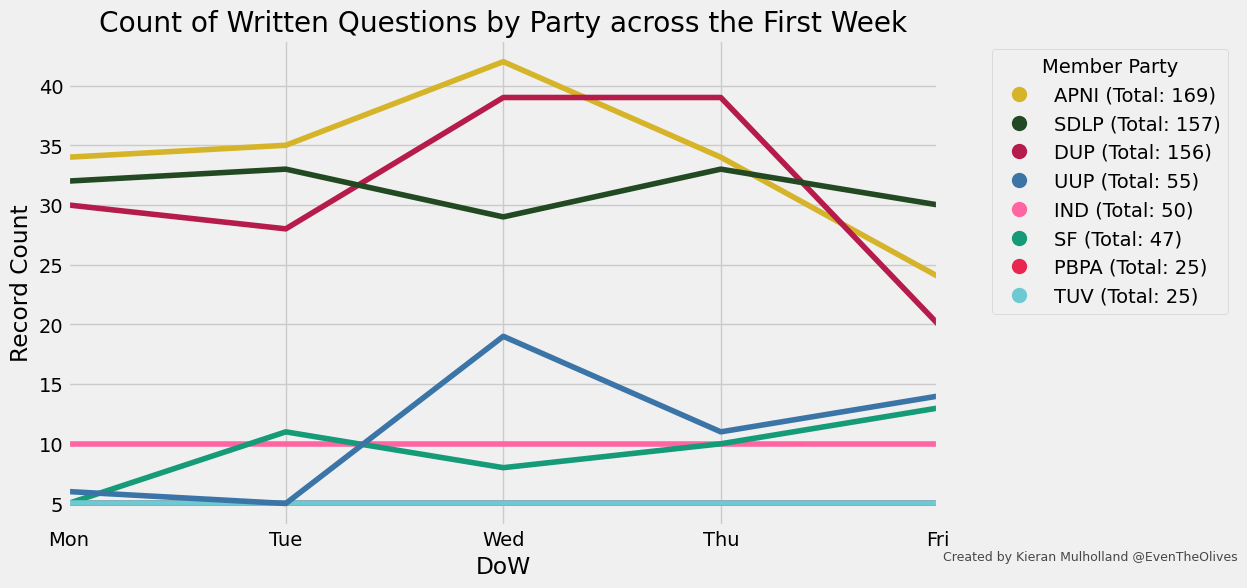

In [15]:
# Creating a line plot using the party colours from the Data/Import section above
plt.figure(figsize=(10,6))
sns.lineplot(data=qbyparty_df, x='DoW', y='Record Count', hue='Member Party', palette=party_colors)

# Remove the original legend and create a custom legend with the total questions per party
plt.gca().get_legend().remove()
sorted_parties = total_questions.sort_values(ascending=False).index
custom_handles = [mlines.Line2D([], [], marker='o', markersize=10, color=party_colors[party], linestyle='None') for party in sorted_parties]
new_labels = [f'{party} (Total: {total_questions[party]})' for party in sorted_parties]
plt.legend(custom_handles, new_labels, title='Member Party', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.text(4.7, 0.5, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7)
plt.title('Count of Written Questions by Party across the First Week')
plt.xlim('Mon', 'Fri')

plt.show()

## by Dept

In [16]:
# qbydept_df to count the number of questions per DEPT and day of week
qbydept_df = writtenQs_df.groupby(['Department', 'DoW']).size().reset_index(name='Record Count')
qbydept_df.head(10)

,Department,DoW,Record Count
0,First Minister and deputy First Minister,Mon,4
1,First Minister and deputy First Minister,Tue,9
2,First Minister and deputy First Minister,Wed,4
3,First Minister and deputy First Minister,Thu,2
4,First Minister and deputy First Minister,Fri,4
5,Minister for Communities,Mon,23
6,Minister for Communities,Tue,23
7,Minister for Communities,Wed,35
8,Minister for Communities,Thu,21
9,Minister for Communities,Fri,22


In [17]:
# add the total by dept for the full week so I can later add it to the legend
total_dept = qbydept_df.groupby('Department')['Record Count'].sum()
qbydept_df['Dept Total Questions'] = qbydept_df['Department'].map(total_dept)
qbydept_df.head()

,Department,DoW,Record Count,Dept Total Questions
0,First Minister and deputy First Minister,Mon,4,23
1,First Minister and deputy First Minister,Tue,9,23
2,First Minister and deputy First Minister,Wed,4,23
3,First Minister and deputy First Minister,Thu,2,23
4,First Minister and deputy First Minister,Fri,4,23


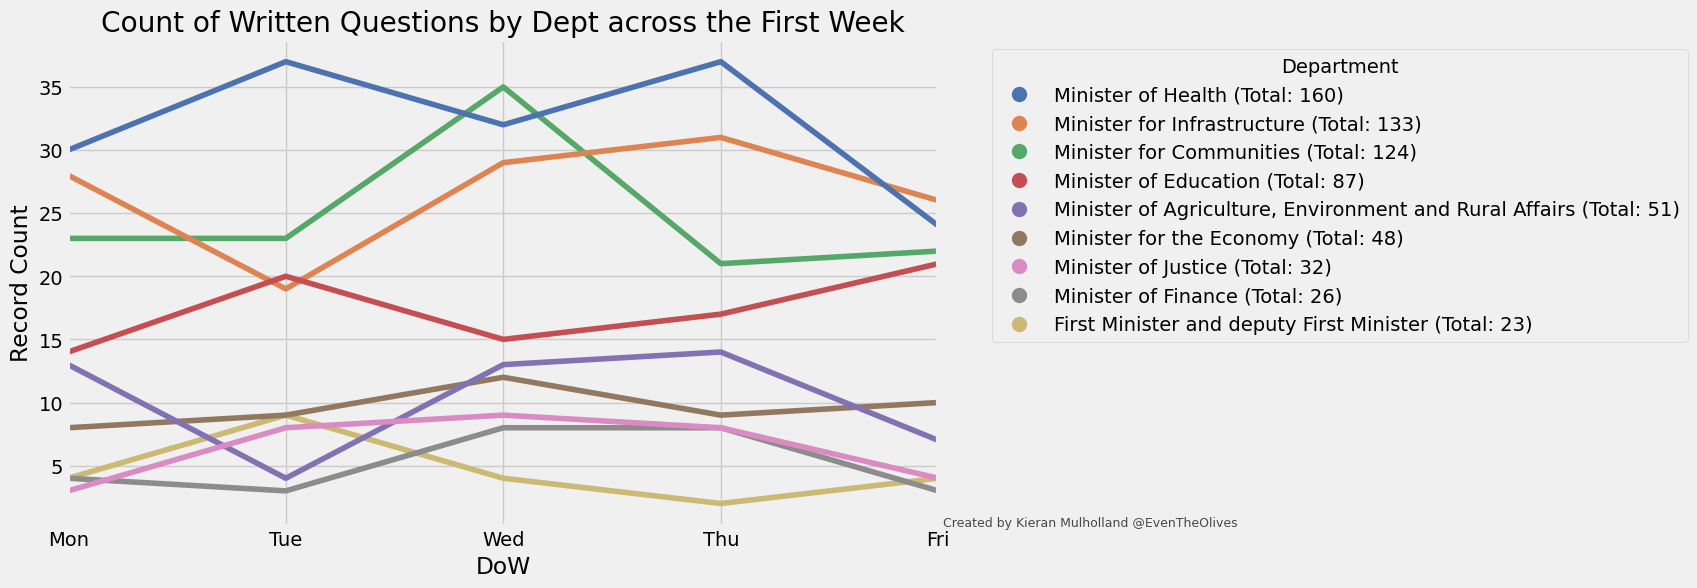

In [18]:
# Creating a line plot using the party colours from the Data/Import section above
sorted_depts = total_dept.sort_values(ascending=False).index
palette = sns.color_palette("deep", len(sorted_depts))
colour_dict = dict(zip(sorted_depts, palette))
plt.figure(figsize=(10,6))
sns.lineplot(data=qbydept_df, x='DoW', y='Record Count', hue='Department', palette=colour_dict)

# Remove the original legend and create a custom legend with the total questions per party
plt.gca().get_legend().remove()
custom_handles = [mlines.Line2D([], [], marker='o', markersize=10, color=colour_dict[dept], linestyle='None') for dept in sorted_depts]
new_labels = [f'{dept} (Total: {total_dept[dept]})' for dept in sorted_depts]
plt.legend(custom_handles, new_labels, title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.text(4.7, 0.5, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7)
plt.title('Count of Written Questions by Dept across the First Week')
plt.xlim('Mon', 'Fri')

plt.show()

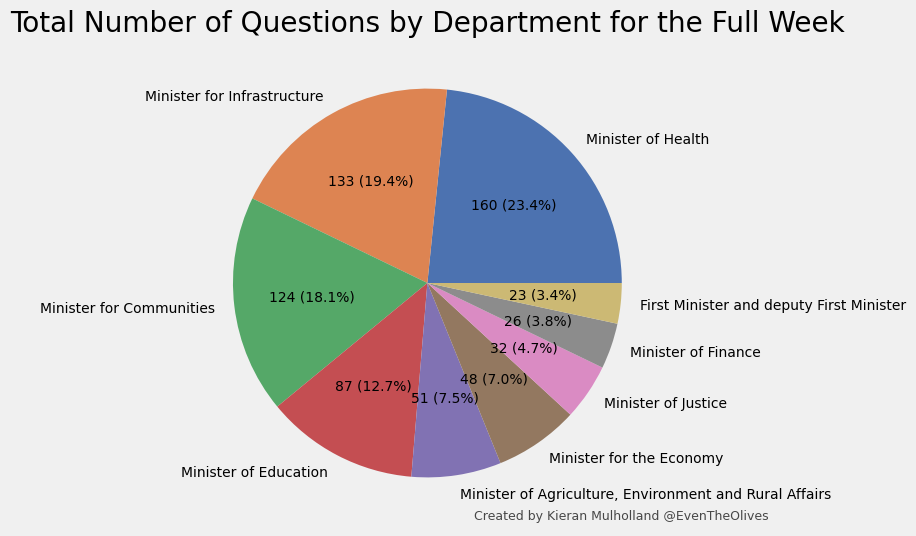

In [19]:
# creating a pie chart for the totals for the full week

# function to create the text combining the values and % share together.
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.1f}%)'.format(p=pct,v=val)
    return my_autopct

sorted_total_dept = total_dept.sort_values(ascending=False)
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(sorted_total_dept, labels=sorted_total_dept.index, colors=[colour_dict[dept] for dept in sorted_total_dept.index], autopct=make_autopct(sorted_total_dept))
for text in texts+autotexts:
    text.set_fontsize(10)

plt.text(1, -1.2, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7)
plt.title('Total Number of Questions by Department for the Full Week')
plt.show()


## by Constituency

In [20]:
# qbyconst_df to count the number of questions per CONST and day of week
qbyconst_df = writtenQs_df.groupby(['Member Constituency', 'DoW']).size().reset_index(name='Record Count')
qbyconst_df.head(10)

,Member Constituency,DoW,Record Count
0,East Antrim,Mon,3
1,East Antrim,Tue,3
2,East Antrim,Wed,5
3,East Antrim,Thu,2
4,East Antrim,Fri,0
5,East Belfast,Mon,15
6,East Belfast,Tue,15
7,East Belfast,Wed,15
8,East Belfast,Thu,7
9,East Belfast,Fri,13


In [21]:
# add the total by dept for the full week so I can later add it to the legend
total_const = qbyconst_df.groupby('Member Constituency')['Record Count'].sum()
qbyconst_df['Const Total Questions'] = qbyconst_df['Member Constituency'].map(total_const)
qbyconst_df.head()

,Member Constituency,DoW,Record Count,Const Total Questions
0,East Antrim,Mon,3,13
1,East Antrim,Tue,3,13
2,East Antrim,Wed,5,13
3,East Antrim,Thu,2,13
4,East Antrim,Fri,0,13


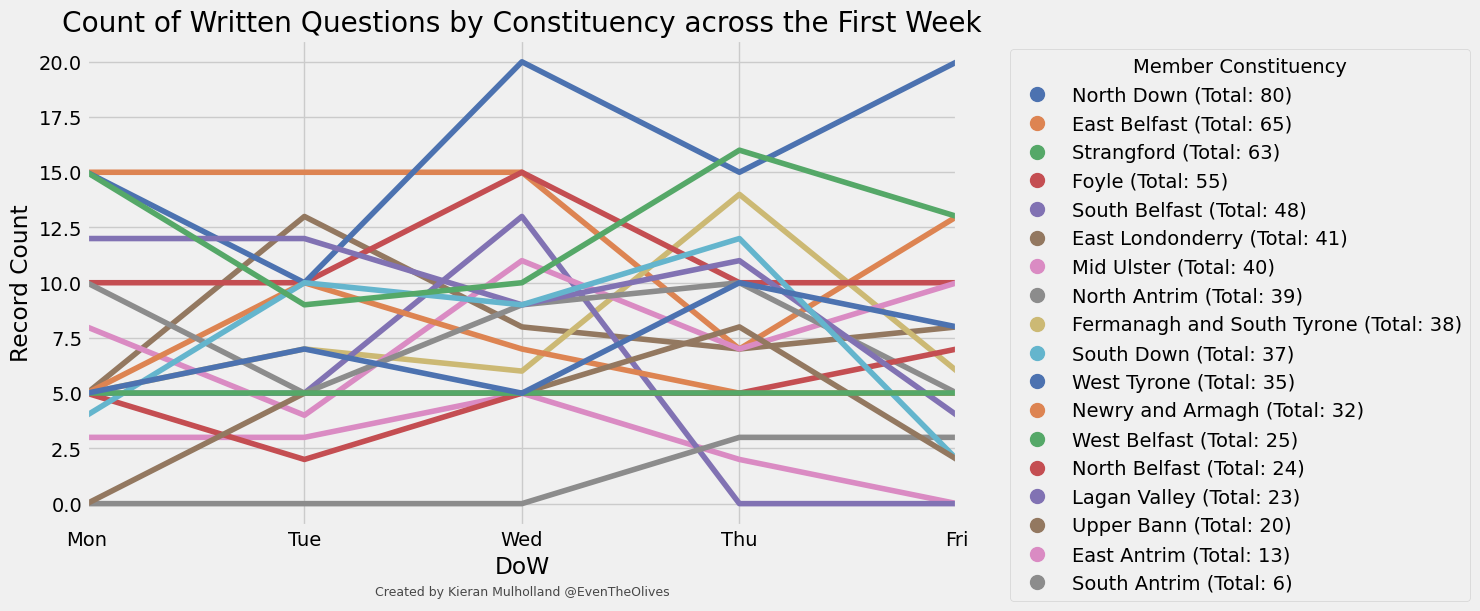

In [22]:
# Creating a line plot with custom coloursfor each constituency
sorted_const = total_const.sort_values(ascending=False).index
palette = sns.color_palette("deep", len(sorted_const))
colour_dict2 = dict(zip(sorted_const, palette))
plt.figure(figsize=(10,6))
sns.lineplot(data=qbyconst_df, x='DoW', y='Record Count', hue='Member Constituency', palette=colour_dict2)

# Remove the original legend and create a custom legend with the total questions per constituency
plt.gca().get_legend().remove()
custom_handles = [mlines.Line2D([], [], marker='o', markersize=10, color=colour_dict2[const], linestyle='None') for const in sorted_const]
new_labels = [f'{const} (Total: {total_const[const]})' for const in sorted_const]
plt.legend(custom_handles, new_labels, title='Member Constituency', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.text(2, -4, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7)
plt.title('Count of Written Questions by Constituency across the First Week')
plt.xlim('Mon', 'Fri')

plt.show()

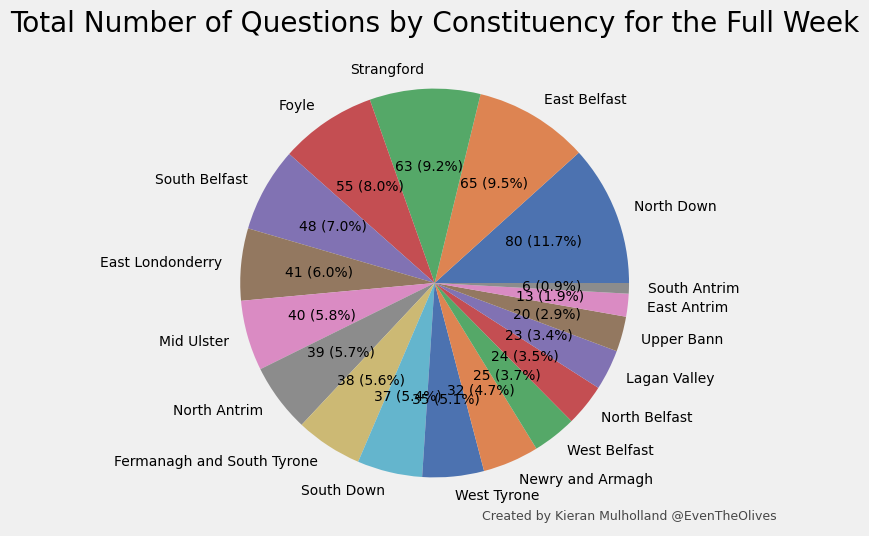

In [23]:
# same piechart as dept but can re-use the function created earlier

sorted_total_const = total_const.sort_values(ascending=False)
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(sorted_total_const, labels=sorted_total_const.index, colors=[colour_dict2[const] for const in sorted_total_const.index], autopct=make_autopct(sorted_total_const))
for text in texts+autotexts:
    text.set_fontsize(10)

plt.text(1, -1.2, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7)
plt.title('Total Number of Questions by Constituency for the Full Week')
plt.show()


# Party Analysis

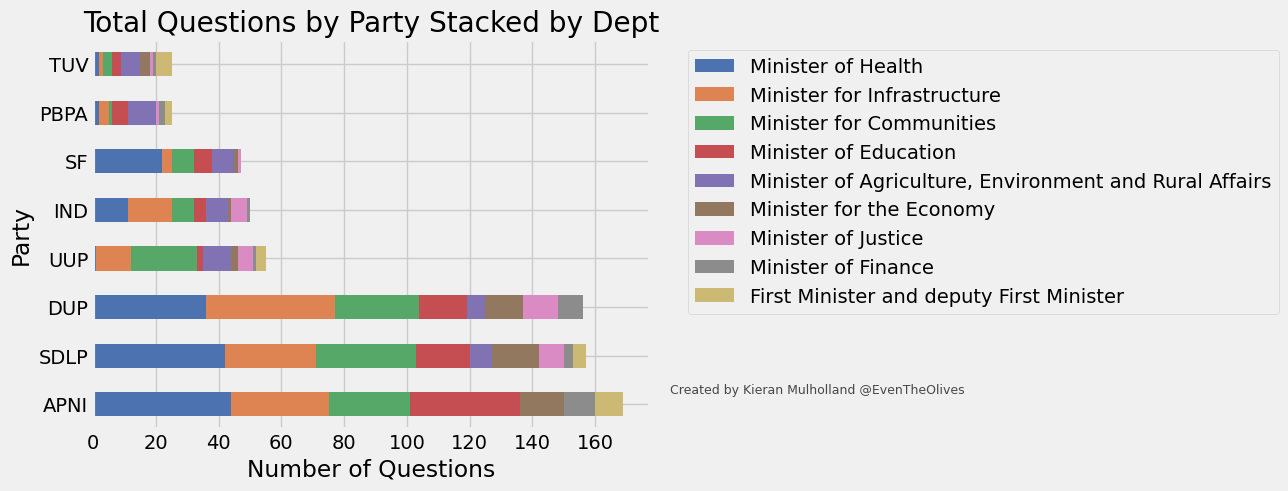

In [24]:
# I'm going to create a stacked bar chart to look at the interests by party

# aggregations
party_dept_counts = writtenQs_df.groupby(['Member Party', 'Department']).size().reset_index(name='Count')
total_questions_per_party = party_dept_counts.groupby('Member Party')['Count'].sum()
total_questions_per_dept = party_dept_counts.groupby('Department')['Count'].sum()
sorted_parties = total_questions_per_party.sort_values(ascending=False).index
sorted_depts = total_questions_per_dept.sort_values(ascending=False).index
party_dept_counts['Member Party'] = party_dept_counts['Member Party'].astype('category')
party_dept_counts['Member Party'] = party_dept_counts['Member Party'].cat.reorder_categories(sorted_parties, ordered=True)
party_dept_counts['Department'] = party_dept_counts['Department'].astype('category')
party_dept_counts['Department'] = party_dept_counts['Department'].cat.reorder_categories(sorted_depts, ordered=True)
pivot_df = party_dept_counts.pivot(index='Member Party', columns='Department', values='Count')
pivot_df = pivot_df.loc[sorted_parties]

# stacked bar chart
dept_colours = [colour_dict[dept] for dept in pivot_df.columns]
pivot_df.plot(kind='barh', stacked=True, color=dept_colours)
plt.title('Total Questions by Party Stacked by Dept')
plt.xlabel('Number of Questions')
plt.ylabel('Party')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.text(1.3, 0.1, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7, transform=plt.gca().transAxes)
plt.show()


## Own Party Questions

In [25]:
# this function will allow me to create a new df to capture the amount of questions asked to a minister in the questioner's own party
def is_own_party(row):
    if row['Department'] == 'First Minister and deputy First Minister':
        return row['Member Party'] in ['SF', 'DUP']
    else:
        return row['Member Party'] == row['Minister Party']

# Apply is_own_party to each record and then aggregate by parties to a new df
writtenQs_df['OwnPartyQuestion'] = writtenQs_df.apply(is_own_party, axis=1)
own_party_counts = writtenQs_df.groupby(['Member Party', 'OwnPartyQuestion']).size().reset_index(name='Count')
own_party_counts['Percentage'] = own_party_counts.groupby('Member Party', group_keys=False)['Count'].apply(lambda x: 100 * x / x.sum())


In [26]:
own_party_counts

,Member Party,OwnPartyQuestion,Count,Percentage
0,APNI,False,169,100.000000
1,DUP,False,119,76.282051
2,DUP,True,37,23.717949
3,IND,False,50,100.000000
4,PBPA,False,25,100.000000
5,SDLP,False,157,100.000000
6,SF,False,44,93.617021
7,SF,True,3,6.382979
8,TUV,False,25,100.000000
9,UUP,False,55,100.000000


In [27]:
# here I'm dropping parties not in the executive

own_party_counts = own_party_counts[own_party_counts['Member Party'].isin(writtenQs_df['Minister Party'].unique())]
own_party_counts

,Member Party,OwnPartyQuestion,Count,Percentage
0,APNI,False,169,100.000000
1,DUP,False,119,76.282051
2,DUP,True,37,23.717949
6,SF,False,44,93.617021
7,SF,True,3,6.382979
9,UUP,False,55,100.000000


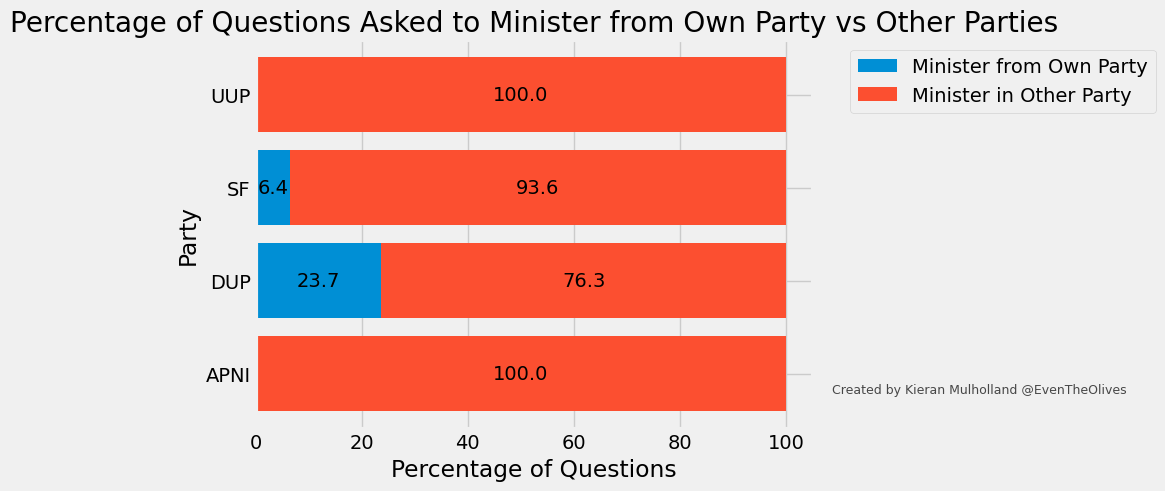

In [28]:
# I want to visualise the percentages between own v other parties
own_party = own_party_counts[own_party_counts['OwnPartyQuestion'] == True]
other_party = own_party_counts[own_party_counts['OwnPartyQuestion'] == False]
own_party = own_party.set_index('Member Party')['Percentage']
other_party = other_party.set_index('Member Party')['Percentage']
parties = own_party_counts['Member Party'].unique()
own_party = own_party.reindex(parties, fill_value=0)
other_party = other_party.reindex(parties, fill_value=0)

# The stacked bar chart now can be filled with these complete dfs
bars_own = plt.barh(parties, own_party, label='Minister from Own Party')
bars_other = plt.barh(parties, other_party, left=own_party, label='Minister in Other Party')
plt.xlabel('Percentage of Questions')
plt.ylabel('Party')
plt.title('Percentage of Questions Asked to Minister from Own Party vs Other Parties')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# here this loop will iterate through the value labels for each df and place them in the segments
for b in bars_own:
    if b.get_width() > 0:
        plt.text(b.get_width()/2, b.get_y() + b.get_height()/2, f'{b.get_width():.1f}', ha='center', va='center')
for b in bars_other:
    if b.get_width() > 0:
        plt.text(b.get_width()/2 + b.get_x(), b.get_y() + b.get_height()/2, f'{b.get_width():.1f}', ha='center', va='center')

plt.text(1.3, 0.1, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7, transform=plt.gca().transAxes)
plt.show()


# Individual Analysis

## Who is asking the most questions?

In [29]:
partyMap = pd.read_excel('/content/NI Assembly Written Questions Week One.xlsx', sheet_name='Party')
partyMap

,NI Assembly Export,Written Questions Abbrev
0,Ulster Unionist Party,UUP
1,Traditional Unionist Voice,TUV
2,Sinn Féin,SF
3,Alliance Party,APNI
4,Democratic Unionist Party,DUP
5,People Before Profit Alliance,PBPA
6,Social Democratic and Labour Party,SDLP
7,Independent,Ind


In [30]:
MLAlist = pd.read_excel('/content/NI Assembly Written Questions Week One.xlsx', sheet_name='ContactDetails07022024_8127')
MLAlist

,Member,Party,Constituency,Address,Town/City,Postcode,Email,Email.1,Tel No
0,Dr Steve Aiken OBE,Ulster Unionist Party,South Antrim,3 The Square,Ballyclare,BT39 9BB,steve.aiken@co.niassembly.gov.uk,steve.aiken@mla.niassembly.gov.uk,2893344966
1,Mr Andy Allen MBE,Ulster Unionist Party,East Belfast,"174 ALBERTBRIDGE ROAD, BALLYMACARRET, BALLYMAC...",BELFAST,BT5 4GS,andy.allen@mla.niassembly.gov.uk,NaN,028 9046 3900
2,Mr Jim Allister KC,Traditional Unionist Voice,North Antrim,38 HENRY STREET,BALLYMENA,BT42 3AH,jim.allister@mla.niassembly.gov.uk,NaN,028 2564 0250
3,Dr Caoimhe Archibald,Sinn Féin,East Londonderry,"81 Main Street, Dungiven",Dungiven,BT47 4LE,caoimhe.archibald@mla.niassembly.gov.uk,NaN,02877 742488
4,Ms Kellie Armstrong,Alliance Party,Strangford,"Unit 3 Conway Buildings, 14 South Street, Corp...",Newtownards,BT23 4JT,Kellie.armstrong@mla.NIAssembly.gov.uk,NaN,028 9181 1414
...,...,...,...,...,...,...,...,...,...
86,Ms Emma Sheerin,Sinn Féin,Mid Ulster,"79 QUARRY ROAD, GULLADUFF",KNOCKCLOGHRIM,BT45 8NS,emma.sheerin@mla.niassembly.gov.uk,NaN,028 7964 4550
87,Mr John Stewart,Ulster Unionist Party,East Antrim,"95 MAIN STREET, TOWN PARKS",LARNE,BT40 1HJ,john.stewart@mla.niassembly.gov.uk,NaN,028 2827 2644
88,Ms Claire Sugden,Independent,East Londonderry,"1 UPPER ABBEY STREET, COLERAINE AND SUBURBS",COLERAINE,BT52 1BF,claire.sugden@mla.niassembly.gov.uk,NaN,028 7032 7294
89,Mr Robin Swann,Ulster Unionist Party,North Antrim,"13-15 QUEEN STREET, BALLYKEEL",BALLYMENA,BT42 2BB,robin.swann@mla.niassembly.gov.uk,NaN,028 2565 9595


In [31]:
member_question_counts = writtenQs_df['Member'].value_counts()
member_question_counts

Mr Alex Easton            25
Mr Mark Durkan            25
Mr Jim Allister KC        25
Mr Justin McNulty         25
Mr Daniel McCrossan       25
Ms Claire Sugden          25
Mr David Brooks           25
Mr Gerry Carroll          25
Ms Sinéad McLaughlin      25
Mrs Deborah Erskine       24
Miss Michelle McIlveen    24
Ms Connie Egan            20
Mr Peter McReynolds       20
Mr Stephen Dunne          20
Mr Andy Allen MBE         20
Mr Nick Mathison          20
Ms Paula Bradshaw         20
Ms Kate Nicholl           19
Ms Kellie Armstrong       18
Mr Patsy McGlone          18
Mr Colin McGrath          18
Mr Phillip Brett          16
Mr Alan Chambers          15
Ms Sorcha Eastwood        14
Ms Emma Sheerin           14
Mr Patrick Brown          13
Ms Cara Hunter            12
Mr Eóin Tennyson          10
Mr Jonathan Buckley       10
Mr Matthew O'Toole         9
Ms Cheryl Brownlee         8
Mr Keith Buchanan          8
Miss Jemma Dolan           7
Ms Liz Kimmins             7
Ms Diane Forsy

In [32]:
# adding members with zero questions
party_mapping = partyMap.set_index('NI Assembly Export')['Written Questions Abbrev'].to_dict()
MLAlist['Member Party'] = MLAlist['Party'].map(party_mapping)
member_question_counts_df = member_question_counts.reset_index()
member_question_counts_df.columns = ['Member', 'Count']
all_members_df = pd.DataFrame({'Member': MLAlist['Member'], 'Count': 0})
all_members_df.set_index('Member', inplace=True)
all_members_df.update(member_question_counts_df.set_index('Member'))
all_members_df.reset_index(inplace=True)


In [33]:
all_members_df


,Member,Count
0,Dr Steve Aiken OBE,3.0
1,Mr Andy Allen MBE,20.0
2,Mr Jim Allister KC,25.0
3,Dr Caoimhe Archibald,0.0
4,Ms Kellie Armstrong,18.0
...,...,...
86,Ms Emma Sheerin,14.0
87,Mr John Stewart,4.0
88,Ms Claire Sugden,25.0
89,Mr Robin Swann,0.0


In [34]:
#why is there 91 MLAs?
all_members_df['Member'].count()

91

In [35]:
all_members_df.nunique()

Member    90
Count     21
dtype: int64

In [36]:
all_members_df[all_members_df['Member'].duplicated(keep=False)]

,Member,Count
15,Mr Patrick Brown,13.0
16,Mr Patrick Brown,13.0


In [37]:
all_members_df = all_members_df.drop(16)
all_members_df = all_members_df.reset_index(drop=True)
all_members_df

,Member,Count
0,Dr Steve Aiken OBE,3.0
1,Mr Andy Allen MBE,20.0
2,Mr Jim Allister KC,25.0
3,Dr Caoimhe Archibald,0.0
4,Ms Kellie Armstrong,18.0
...,...,...
85,Ms Emma Sheerin,14.0
86,Mr John Stewart,4.0
87,Ms Claire Sugden,25.0
88,Mr Robin Swann,0.0


In [38]:
all_members_df[all_members_df['Member'].duplicated(keep=False)]

,Member,Count


In [56]:
# seems to be due to two addresses for Patrick Brown
MLAlist[MLAlist['Member'].duplicated(keep=False)]

,Member,Party,Constituency,Address,Town/City,Postcode,Email,Email.1,Tel No,Member Party
15,Mr Patrick Brown,Alliance Party,South Down,"2 Meeting Street, RINGMACKILROY",WARRENPOINT,BT34 3JZ,patrick.brown@mla.niassembly.gov.uk,NaN,NaN,APNI
16,Mr Patrick Brown,Alliance Party,South Down,"9 Market Lane, Demesne of Down Acre",Downpatrick,BT30 6TH,patrick.brown@co.niassembly.gov.uk,patrick.brown@mla.niassembly.gov.uk,NaN,APNI


In [57]:
MLAlist = MLAlist.drop(16)
MLAlist = MLAlist.reset_index(drop=True)
MLAlist

,Member,Party,Constituency,Address,Town/City,Postcode,Email,Email.1,Tel No,Member Party
0,Dr Steve Aiken OBE,Ulster Unionist Party,South Antrim,3 The Square,Ballyclare,BT39 9BB,steve.aiken@co.niassembly.gov.uk,steve.aiken@mla.niassembly.gov.uk,2893344966,UUP
1,Mr Andy Allen MBE,Ulster Unionist Party,East Belfast,"174 ALBERTBRIDGE ROAD, BALLYMACARRET, BALLYMAC...",BELFAST,BT5 4GS,andy.allen@mla.niassembly.gov.uk,NaN,028 9046 3900,UUP
2,Mr Jim Allister KC,Traditional Unionist Voice,North Antrim,38 HENRY STREET,BALLYMENA,BT42 3AH,jim.allister@mla.niassembly.gov.uk,NaN,028 2564 0250,TUV
3,Dr Caoimhe Archibald,Sinn Féin,East Londonderry,"81 Main Street, Dungiven",Dungiven,BT47 4LE,caoimhe.archibald@mla.niassembly.gov.uk,NaN,02877 742488,SF
4,Ms Kellie Armstrong,Alliance Party,Strangford,"Unit 3 Conway Buildings, 14 South Street, Corp...",Newtownards,BT23 4JT,Kellie.armstrong@mla.NIAssembly.gov.uk,NaN,028 9181 1414,APNI
...,...,...,...,...,...,...,...,...,...,...
85,Ms Emma Sheerin,Sinn Féin,Mid Ulster,"79 QUARRY ROAD, GULLADUFF",KNOCKCLOGHRIM,BT45 8NS,emma.sheerin@mla.niassembly.gov.uk,NaN,028 7964 4550,SF
86,Mr John Stewart,Ulster Unionist Party,East Antrim,"95 MAIN STREET, TOWN PARKS",LARNE,BT40 1HJ,john.stewart@mla.niassembly.gov.uk,NaN,028 2827 2644,UUP
87,Ms Claire Sugden,Independent,East Londonderry,"1 UPPER ABBEY STREET, COLERAINE AND SUBURBS",COLERAINE,BT52 1BF,claire.sugden@mla.niassembly.gov.uk,NaN,028 7032 7294,Ind
88,Mr Robin Swann,Ulster Unionist Party,North Antrim,"13-15 QUEEN STREET, BALLYKEEL",BALLYMENA,BT42 2BB,robin.swann@mla.niassembly.gov.uk,NaN,028 2565 9595,UUP


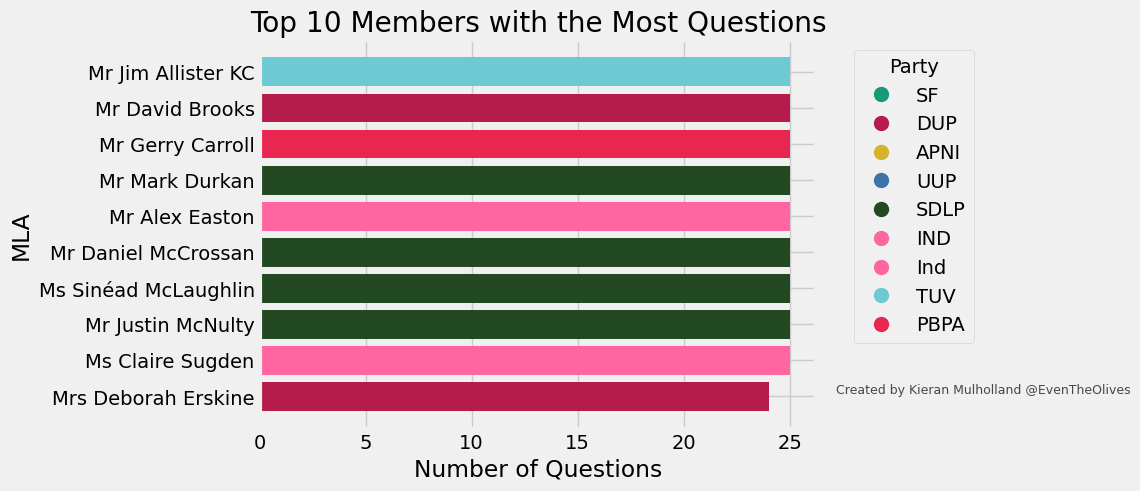

In [39]:
# aggregate counts per mla and get the top ten, then add party and map the party colours
top_10_members = all_members_df.nlargest(10, 'Count')
top_10_members_df = top_10_members.reset_index()
top_10_members_df.columns = ['Index', 'Member', 'Count']  # Corrected here
top_10_members_df['Member Party'] = top_10_members_df['Member'].map(writtenQs_df.drop_duplicates('Member').set_index('Member')['Member Party'])
top_10_members_df['Color'] = top_10_members_df['Member Party'].map(party_colors)

# create bar chart
plt.barh(top_10_members_df['Member'], top_10_members_df['Count'], color=top_10_members_df['Color'])
plt.xlabel('Number of Questions')
plt.ylabel('MLA')
plt.title('Top 10 Members with the Most Questions')
plt.gca().invert_yaxis()

for party, color in party_colors.items():
    plt.plot([], [], label=party, color=color, marker='o', markersize=10, linestyle='')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Party')
plt.text(1.3, 0.1, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7, transform=plt.gca().transAxes)
plt.show()


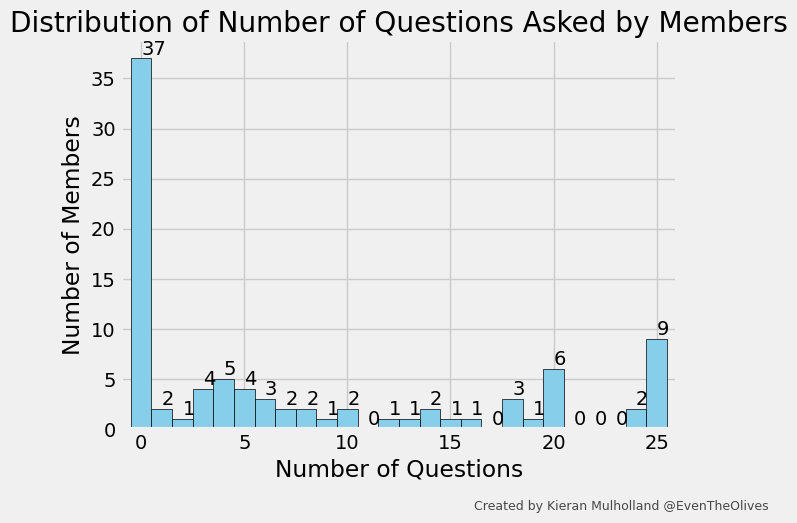

In [40]:
# create a histogram to display the frequency of the amount of written questions by MLAs
counts, bins, patches = plt.hist(all_members_df['Count'], bins=range(27), edgecolor='black', color='skyblue', align='left')

for count, bin, patch in zip(counts, bins, patches):
    plt.text(bin, count, int(count), ha='left', va='bottom')

plt.xlabel('Number of Questions')
plt.ylabel('Number of Members')
plt.title('Distribution of Number of Questions Asked by Members')

# here I've limited the x axis - this will need adjusted if the dataset increases.  Perhaps this could be linked to the number of days in the dataset multiplied by 5 (since that's the max questions allowed)
plt.xlim([-1, 26])
plt.xticks(range(0, 26, 5))
plt.text(0.9, -0.2, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7, transform=plt.gca().transAxes)

plt.show()


In [59]:
#How many of the 37 are SF?
print(writtenQs_df[writtenQs_df['Member Party'] == 'SF'].nunique())
print(MLAlist[MLAlist['Party'] == 'Sinn Féin'].nunique())


Ref No                 47
Member                  7
Member Party            1
Member Constituency     6
Question               47
Tabled                  5
Status                  8
DoW                     5
Department              7
Minister                7
Minister Party          4
Record Count            1
OwnPartyQuestion        2
IsPriority              2
dtype: int64
Member          27
Party            1
Constituency    13
Address         26
Town/City       23
Postcode        26
Email           27
Email.1          0
Tel No          20
Member Party     1
dtype: int64


In [41]:
# now that I have a record of all MLAs including those with zero questions - which parties are asking the most questions relevent to their MLA numbers?

party_dict = MLAlist.set_index('Member')['Member Party'].to_dict()
all_members_df['Member Party'] = all_members_df['Member'].map(party_dict)
average_questions = all_members_df.groupby('Member Party')['Count'].mean()
average_questions

Member Party
APNI     9.941176
DUP      6.240000
Ind     25.000000
PBPA    25.000000
SDLP    19.625000
SF       1.740741
TUV     25.000000
UUP      6.000000
Name: Count, dtype: float64

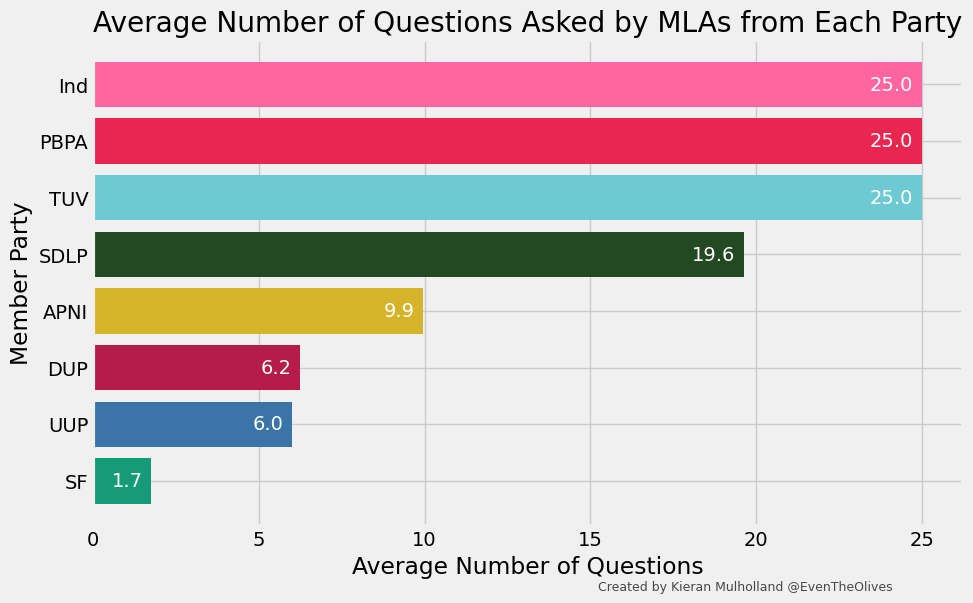

In [42]:
# Visualising the average questions above

average_questions_df = average_questions.reset_index()
average_questions_df = average_questions_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(average_questions_df['Member Party'], average_questions_df['Count'], color=average_questions_df['Member Party'].map(party_colors))

for bar in bars:
    width = bar.get_width()
    plt.text(width-0.25, bar.get_y() + bar.get_height()/2, '%.1f' % width, ha='right', va='center', color='white')

plt.xlabel('Average Number of Questions')
plt.ylabel('Member Party')
plt.title('Average Number of Questions Asked by MLAs from Each Party')
plt.gca().invert_yaxis()
plt.text(0.75, -0.125, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7, transform=plt.gca().transAxes)
plt.show()


# Question Analysis

## Wordclouds by Department

In [43]:
# I need to create a collection of stop words so that as far as is reasonable, only useful words are displayed or at least are prominent
nltk.download('stopwords')
nltk.download('punkt')

custom_stop_words = set(stopwords.words('english'))
custom_stop_words.update(["ask", "whether", "update", "department", "i", "ii", "iii", "iv", "v", "northern", "ireland", "priority", "take", "written"])

departments = writtenQs_df['Department'].unique()
for dept in departments:
    dept = dept.translate(str.maketrans('', '', string.punctuation)).lower()
    words = dept.split()
    custom_stop_words.update(words)

# this loops through a wordcloud per dept
for dept in departments:
    dept_questions = writtenQs_df[writtenQs_df['Department'] == dept]['Question']
    dept_questions = dept_questions.str.lower().str.replace('[^\w\s]', '', regex=True)
    tokenized = dept_questions.apply(nltk.word_tokenize)
    filtered_questions = tokenized.apply(lambda x: [word for word in x if word not in custom_stop_words])
    word_freq = nltk.FreqDist(w for words_list in filtered_questions for w in words_list)
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(dept)
    plt.axis('off')
    plt.text(0.75, -0.05, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7, transform=plt.gca().transAxes)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Priority Questions

In [44]:
# add a boolean column to determine whether it is a priority question and determine the amount of priority questions for each dept
writtenQs_df['IsPriority'] = writtenQs_df['Question'].str.endswith('[Priority Written]')
priority_counts = writtenQs_df.groupby('Department')['IsPriority'].sum().astype(int)
total_counts = writtenQs_df['Department'].value_counts()
priority_percentages = (priority_counts / total_counts * 100).round(2)

priority_df = pd.DataFrame({
    'TotalQuestions': total_counts,
    'PriorityQuestions': priority_counts,
    'PercentagePriority': priority_percentages
})

print(priority_df)


                                                    TotalQuestions  \
First Minister and deputy First Minister                        23   
Minister for Communities                                       124   
Minister for Infrastructure                                    133   
Minister for the Economy                                        48   
Minister of Agriculture, Environment and Rural ...              51   
Minister of Education                                           87   
Minister of Finance                                             26   
Minister of Health                                             160   
Minister of Justice                                             32   

                                                    PriorityQuestions  \
First Minister and deputy First Minister                            1   
Minister for Communities                                            9   
Minister for Infrastructure                                         7   
Ministe

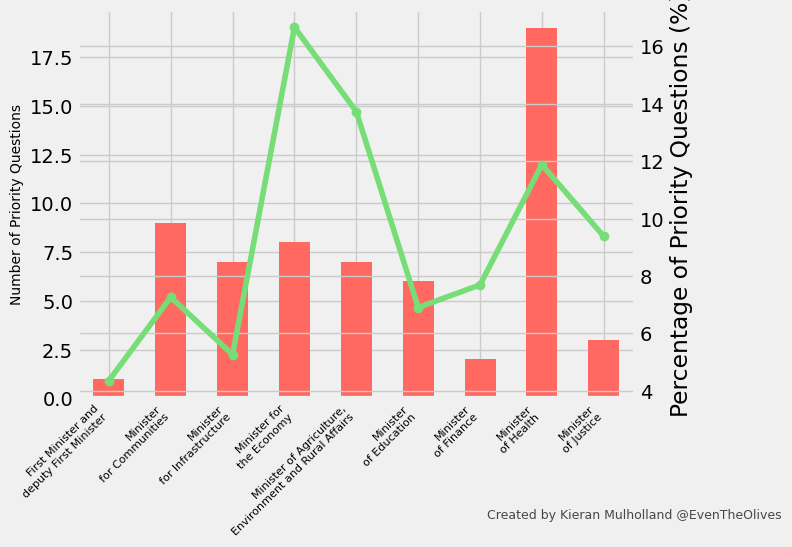

In [45]:
# Plot the amount of priority q's and the % of total by dept

fig, ax1 = plt.subplots()
priority_df['PriorityQuestions'].plot(kind='bar', color='#FF6961', ax=ax1)
ax1.set_ylabel('Number of Priority Questions', fontsize=10)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
priority_df['PercentagePriority'].plot(kind='line', color='#77DD77', marker='o', ax=ax2)
ax2.set_ylabel('Percentage of Priority Questions (%)')
ax2.tick_params(axis='y')

#function to enable me to put a line break within the dept names for the x labels
def add_line_break(label):
    words = label.split(' ')
    mid = len(words) // 2
    return ' '.join(words[:mid]) + '\n' + ' '.join(words[mid:])

ax1.set_xticklabels([add_line_break(label) for label in priority_df.index], rotation=45, ha='right')
ax1.tick_params(axis='x', labelsize=8)

plt.text(1, -0.3, 'Created by Kieran Mulholland @EvenTheOlives', fontsize=9, ha='center', va='center', alpha=0.7, transform=plt.gca().transAxes)
plt.show()


## Popular topics

### Casement Park

In [46]:
# Filter for questions containing 'Casement' (case insensitive) and drop unneeded collumns
casement_questions = writtenQs_df[writtenQs_df['Question'].str.contains('Casement', case=False)]
casement_questions = casement_questions[['Member', 'Member Party', 'Question']]

casement_questions_list = casement_questions['Question'].tolist()
for question in casement_questions_list:
    print(question)

casement_questions

To ask the Minister for Communities (i) for his assessment of the Casement Park project; (ii) what steps he intends to take as a result of that assessment; and (iii) what departmental funding is anticipated as being required for the project.
To ask the Minister for Communities (i) for an update on the progress of the Casement Park project; and, (ii) whether the project programme will facilitate the Ulster GAA Senior Football Final being played there in 2027.
To ask the Minister for Communities whether there has been an updated business case developed for the Casement Park project.
To ask the Minister for Communities how much has been spent to date on the Casement Park project by (i) the Department; and (ii) the GAA.
To ask the Minister for Communities (i) whether he will halt the redevelopment of Casement Park; and (ii) to provide justification to any continuance to this project. [Priority Written]
To ask the Minister for Communities (i) for an update on the Casement Park project; and 

,Member,Member Party,Question
22,Mr Jim Allister KC,TUV,To ask the Minister for Communities (i) for hi...
30,Mr Justin McNulty,SDLP,To ask the Minister for Communities (i) for an...
144,Miss Michelle McIlveen,DUP,To ask the Minister for Communities whether th...
145,Miss Michelle McIlveen,DUP,To ask the Minister for Communities how much h...
437,Mr Jim Allister KC,TUV,To ask the Minister for Communities (i) whethe...
541,Mr Alan Chambers,UUP,To ask the Minister for Communities (i) for an...


### Protocol / Command Paper / Windsor Framwork etc.

In [63]:

# Filter for questions containing 'protocol', 'Irish Sea', 'Command Paper'
terms = ['protocol', 'Irish Sea', 'Command Paper', 'Windsor']
pattern = '|'.join(terms)
protocol_questions = writtenQs_df[writtenQs_df['Question'].str.contains(pattern, case=False)]
protocol_questions = protocol_questions[['Member', 'Member Party', 'Question', 'Department']]
protocol_questions = protocol_questions.sort_values('Question')

for row in protocol_questions.itertuples():
    print(f"{row.Member}: {row.Question}")


Mr Jim Allister KC: To ask the First Minister and deputy First Minister to detail (i) each EU law referenced in Annex 2 of the Northern Ireland Protocol which impacts the work of their Department; (ii) each such EU law adopted since the publication of Annex 2 which impacts the work of their Department; and (iii) each EU law which has been removed from application in respect of their Department and its responsibilities.
Mr Jim Allister KC: To ask the First Minister and deputy First Minister what steps their Department has taken, or plans to take, on foot of Command Paper, Safeguarding the Union. [Priority Written]
Mr Jim Allister KC: To ask the First Minister and deputy First Minister whether there is a legislative or practical impact on their Department and its responsibilities as a result of the Command Paper, Safeguarding the Union.
Mr Jim Allister KC: To ask the Minister for Communities whether there is a legislative or practical impact on his Department and its responsibilities as 

### Childcare

In [48]:
# Filter for questions containing childcare related terms
terms = ['childcare', 'daycare']
pattern = '|'.join(terms)

childcare_questions = writtenQs_df[writtenQs_df['Question'].str.contains(pattern, case=False)]
childcare_questions = childcare_questions[['Member', 'Member Party', 'Question', 'Department']]

childcare_questions_list = childcare_questions['Question'].tolist()
for question in childcare_questions_list:
    print(question)

childcare_questions

To ask the Minister of Education (i) what steps he will take to urgently prioritise the publication of the draft Early Education and Childcare Strategy; and, (ii) how he will ensure that parents are fully included in the consultation. [Priority Written]
To ask the Minister of Education for an update on the development of an Executive Childcare Strategy.
To ask the Minister of Education what plans he has to introduce child-centred, affordable, flexible, high-quality childcare in Northern Ireland.
To ask the Minister of Finance for an update on correspondence with HMRC in relation to the Tax-Free Childcare scheme, to take into account the call for the removal of the cap and extension of support for families.
To ask the Minister for Communities what action he can take to address the cost of childcare for parents. [Priority Written]
To ask the Minister of Education what plans his Department has to support working families in making childcare more affordable.
To ask the Minister of Health w

,Member,Member Party,Question,Department
63,Ms Sinéad McLaughlin,SDLP,To ask the Minister of Education (i) what step...,Minister of Education
82,Mr Patsy McGlone,SDLP,To ask the Minister of Education for an update...,Minister of Education
104,Ms Kate Nicholl,APNI,To ask the Minister of Education what plans he...,Minister of Education
234,Ms Kate Nicholl,APNI,To ask the Minister of Finance for an update o...,Minister of Finance
442,Mr Justin McNulty,SDLP,To ask the Minister for Communities what actio...,Minister for Communities
473,Mr Jonathan Buckley,DUP,To ask the Minister of Education what plans hi...,Minister of Education
484,Ms Diane Forsythe,DUP,To ask the Minister of Health when the review ...,Minister of Health
485,Ms Diane Forsythe,DUP,To ask the Minister of Health (i) why childcar...,Minister of Health
492,Mr Phillip Brett,DUP,To ask the Minister for the Economy for his as...,Minister for the Economy
524,Ms Kate Nicholl,APNI,To ask the Minister of Education for an update...,Minister of Education


In [49]:
# Filter for questions containing SEN related terms
terms = [r'\bSEN\b', 'special educational needs']
pattern = '|'.join(terms)

sen_questions = writtenQs_df[writtenQs_df['Question'].str.contains(pattern, case=False)]
sen_questions = sen_questions[['Member', 'Member Party', 'Question', 'Department']]

sen_questions_list = sen_questions['Question'].tolist()
for question in sen_questions_list:
    print(question)

sen_questions

To ask the Minister of Education how they will ensure that Specialist Provisions in Mainstream Schools receive sufficient capital spend to meet the needs of learners with special educational needs.
To ask the Minister of Education what steps his Department is taking to ensure that all children with special educational needs requiring placements in (i) pre-school, (ii) Primary 1; and (iii) Year 8 for the academic year 24/25, will receive a placement in a setting appropriate to their needs before the end of the current academic year.
To ask the Minister of Education for an update on the rollout of integrated teams to provide support to SEN learners in Northern Ireland.
To ask the Minister of Education for an update on the End to End Review of Special Educational Needs.
To ask the Minister of Education (i) for his assessment of the current provision of special educational needs placements within Mid Ulster; and (ii) whether he plans to increase this provision.
To ask the Minister of Educa

,Member,Member Party,Question,Department
101,Mr Nick Mathison,APNI,To ask the Minister of Education how they will...,Minister of Education
102,Mr Nick Mathison,APNI,To ask the Minister of Education what steps hi...,Minister of Education
228,Mr Nick Mathison,APNI,To ask the Minister of Education for an update...,Minister of Education
233,Ms Kate Nicholl,APNI,To ask the Minister of Education for an update...,Minister of Education
265,Ms Emma Sheerin,SF,To ask the Minister of Education (i) for his a...,Minister of Education
342,Ms Cara Hunter,SDLP,To ask the Minister of Education what funds ar...,Minister of Education
470,Mr Jonathan Buckley,DUP,To ask the Minister of Education for his asses...,Minister of Education
585,Mr Justin McNulty,SDLP,To ask the Minister of Education to detail the...,Minister of Education
654,Mr Nick Mathison,APNI,To ask the Minister of Education what support ...,Minister of Education


In [50]:
# Filter for questions containing public sector pay related terms
terms = [r'\bpay\b', 'pay award', 'public sector pay', 'strike', 'unions']
pattern = '|'.join(terms)

pay_questions = writtenQs_df[writtenQs_df['Question'].str.contains(pattern, case=False, regex=True)]
pay_questions = pay_questions[['Member', 'Member Party', 'Question', 'Department']]

pay_questions_list = pay_questions['Question'].tolist()
for question in pay_questions_list:
    print(question)

pay_questions

To ask the Minister of Health what work he will undertake to (i) ensure pay parity with junior doctors in Britain; and (ii) improve the working conditions for junior doctors.
To ask the Minister of Health to outline (i) what work will be undertaken to address the issue of pay parity for nurses; (ii) whether such work will include addressing safer working practices; and (iii) what timescales will be associated with resolving these matters.
To ask the Minister of Finance for an update on the non-teaching staff pay and grading review business case. [Priority Written]
To ask the Minister of Education how they will address the ongoing (i) teachers'; and, (ii) head teachers' pay dispute.
To ask the Minister of Finance what provisions she will put in place to provide public sector workers with a pay increase in the new financial year.
To ask the Minister of Health (i) for his assessment of the current state of care in the community; and (ii) what steps he will take to (a) expand access to dom

,Member,Member Party,Question,Department
90,Mr Colin McGrath,SDLP,To ask the Minister of Health what work he wil...,Minister of Health
91,Mr Colin McGrath,SDLP,To ask the Minister of Health to outline (i) w...,Minister of Health
98,Mr Nick Mathison,APNI,To ask the Minister of Finance for an update o...,Minister of Finance
100,Mr Nick Mathison,APNI,To ask the Minister of Education how they will...,Minister of Education
116,Mr Gerry Carroll,PBPA,To ask the Minister of Finance what provisions...,Minister of Finance
164,Mr Justin McNulty,SDLP,To ask the Minister of Health (i) for his asse...,Minister of Health
236,Mr David Brooks,DUP,To ask the Minister for Infrastructure whether...,Minister for Infrastructure
241,Mr Gerry Carroll,PBPA,To ask the Minister for Infrastructure for his...,Minister for Infrastructure
258,Mr Alex Easton,IND,To ask the Minister of Finance when public sec...,Minister of Finance
264,Ms Emma Sheerin,SF,To ask the Minister of Education whether he ha...,Minister of Education
